In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load data
results_path = Path('../../../results/all/experiment_results.csv')
df = pd.read_csv(results_path)

# Filter for synthetic datasets
synthetic_datasets = ['A', 'B', 'C', 'D']
df_synthetic = df[df['dataset_id'].isin(synthetic_datasets)]

print(f"Loaded {len(df_synthetic)} synthetic experiments")
print(f"Methods: {df_synthetic['model_name'].unique()}")
print(f"Datasets: {df_synthetic['dataset_id'].unique()}")


Loaded 120 synthetic experiments
Methods: ['lasso' 'lassonet' 'nimo' 'random_forest' 'neural_net']
Datasets: ['A' 'B' 'C' 'D']


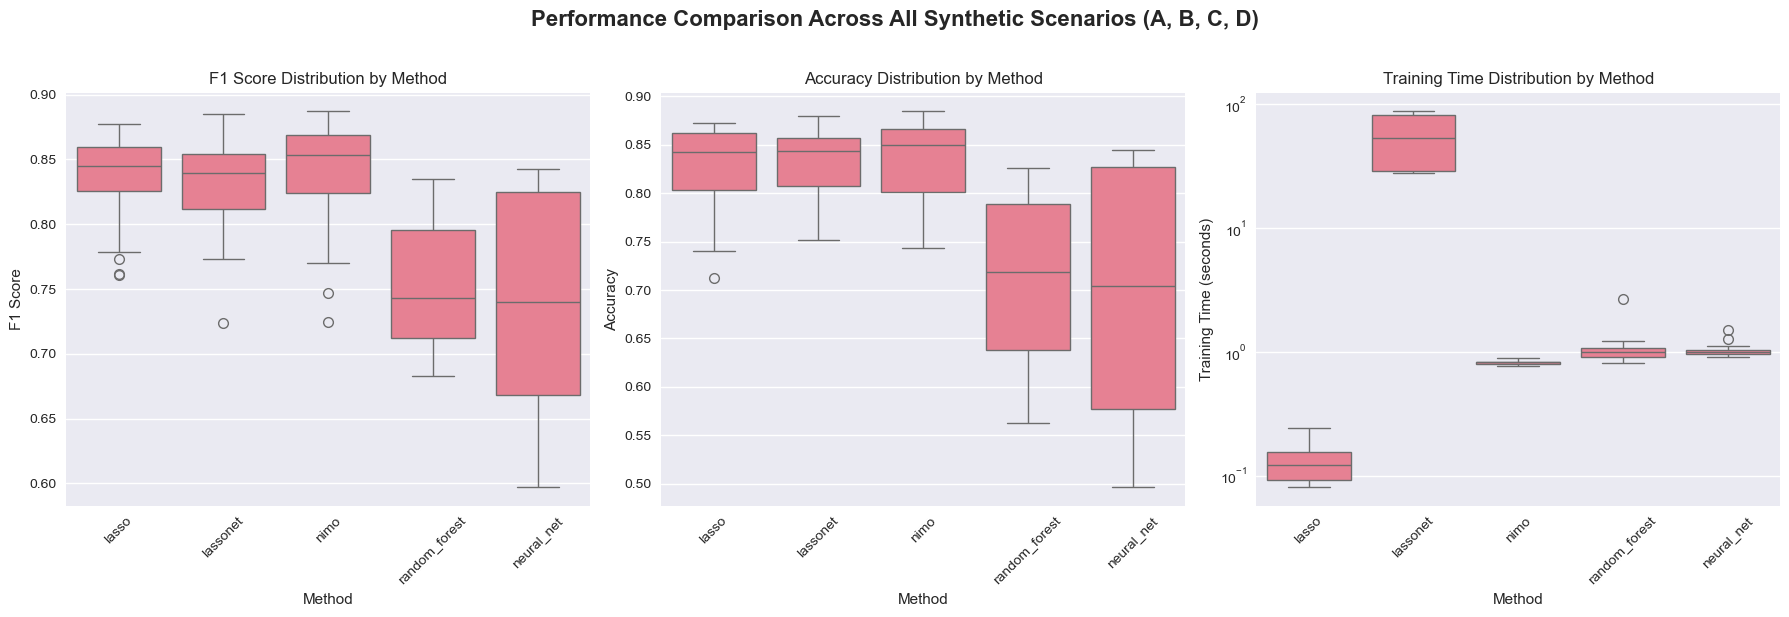

In [18]:
# 1. Boxplots for F1, Accuracy, Time
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Add main title
fig.suptitle('Performance Comparison Across All Synthetic Scenarios (A, B, C, D)', fontsize=16, fontweight='bold', y=1.02)

# F1 Score
sns.boxplot(data=df_synthetic, x='model_name', y='f1', ax=axes[0])
axes[0].set_title('F1 Score Distribution by Method')
axes[0].set_xlabel('Method')
axes[0].set_ylabel('F1 Score')
axes[0].tick_params(axis='x', rotation=45)

# Accuracy
sns.boxplot(data=df_synthetic, x='model_name', y='accuracy', ax=axes[1])
axes[1].set_title('Accuracy Distribution by Method')
axes[1].set_xlabel('Method')
axes[1].set_ylabel('Accuracy')
axes[1].tick_params(axis='x', rotation=45)

# Training Time (logarithmic scale)
sns.boxplot(data=df_synthetic, x='model_name', y='training_time', ax=axes[2])
axes[2].set_title('Training Time Distribution by Method')
axes[2].set_xlabel('Method')
axes[2].set_ylabel('Training Time (seconds)')
axes[2].set_yscale('log')  # Logarithmic scale
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


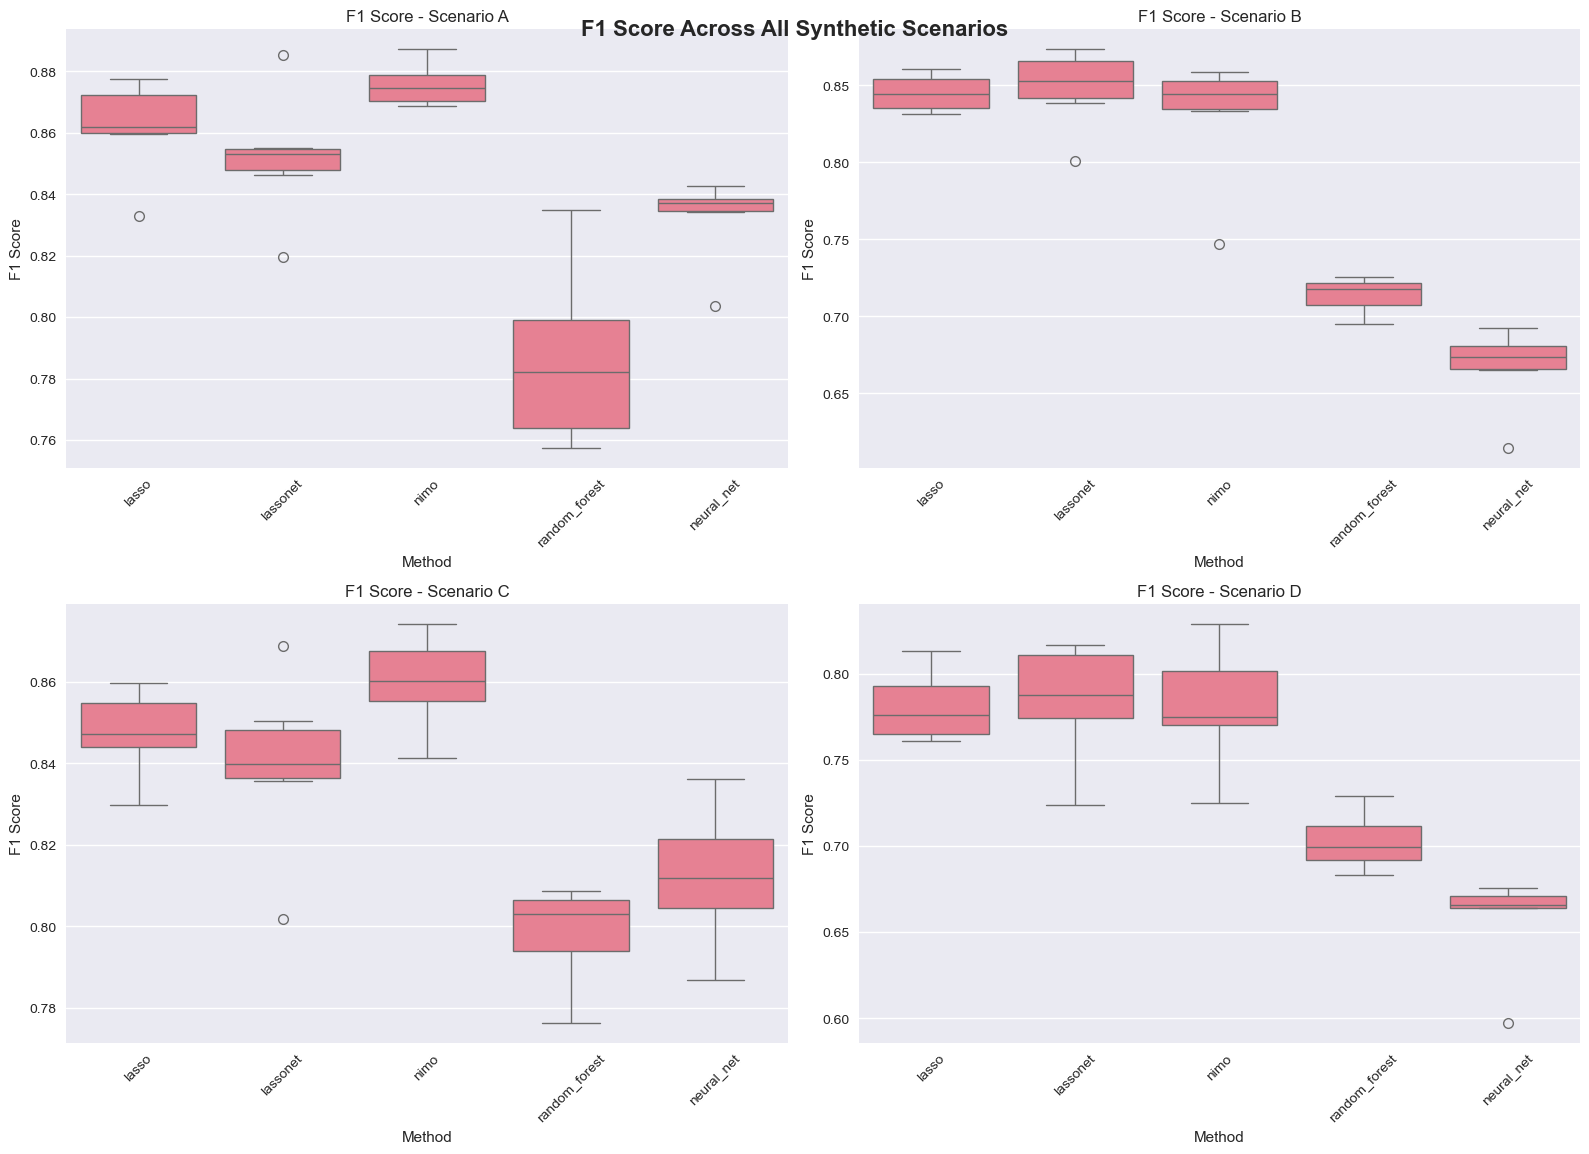

In [20]:
# 4. Performance by Dataset - F1 Score
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Add main title
fig.suptitle('F1 Score Across All Synthetic Scenarios', fontsize=16, fontweight='bold', y=0.95)

for i, dataset in enumerate(synthetic_datasets):
    dataset_data = df_synthetic[df_synthetic['dataset_id'] == dataset]
    
    # F1 Score by method for this dataset
    sns.boxplot(data=dataset_data, x='model_name', y='f1', ax=axes[i])
    axes[i].set_title(f'F1 Score - Scenario {dataset}')
    axes[i].set_xlabel('Method')
    axes[i].set_ylabel('F1 Score')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


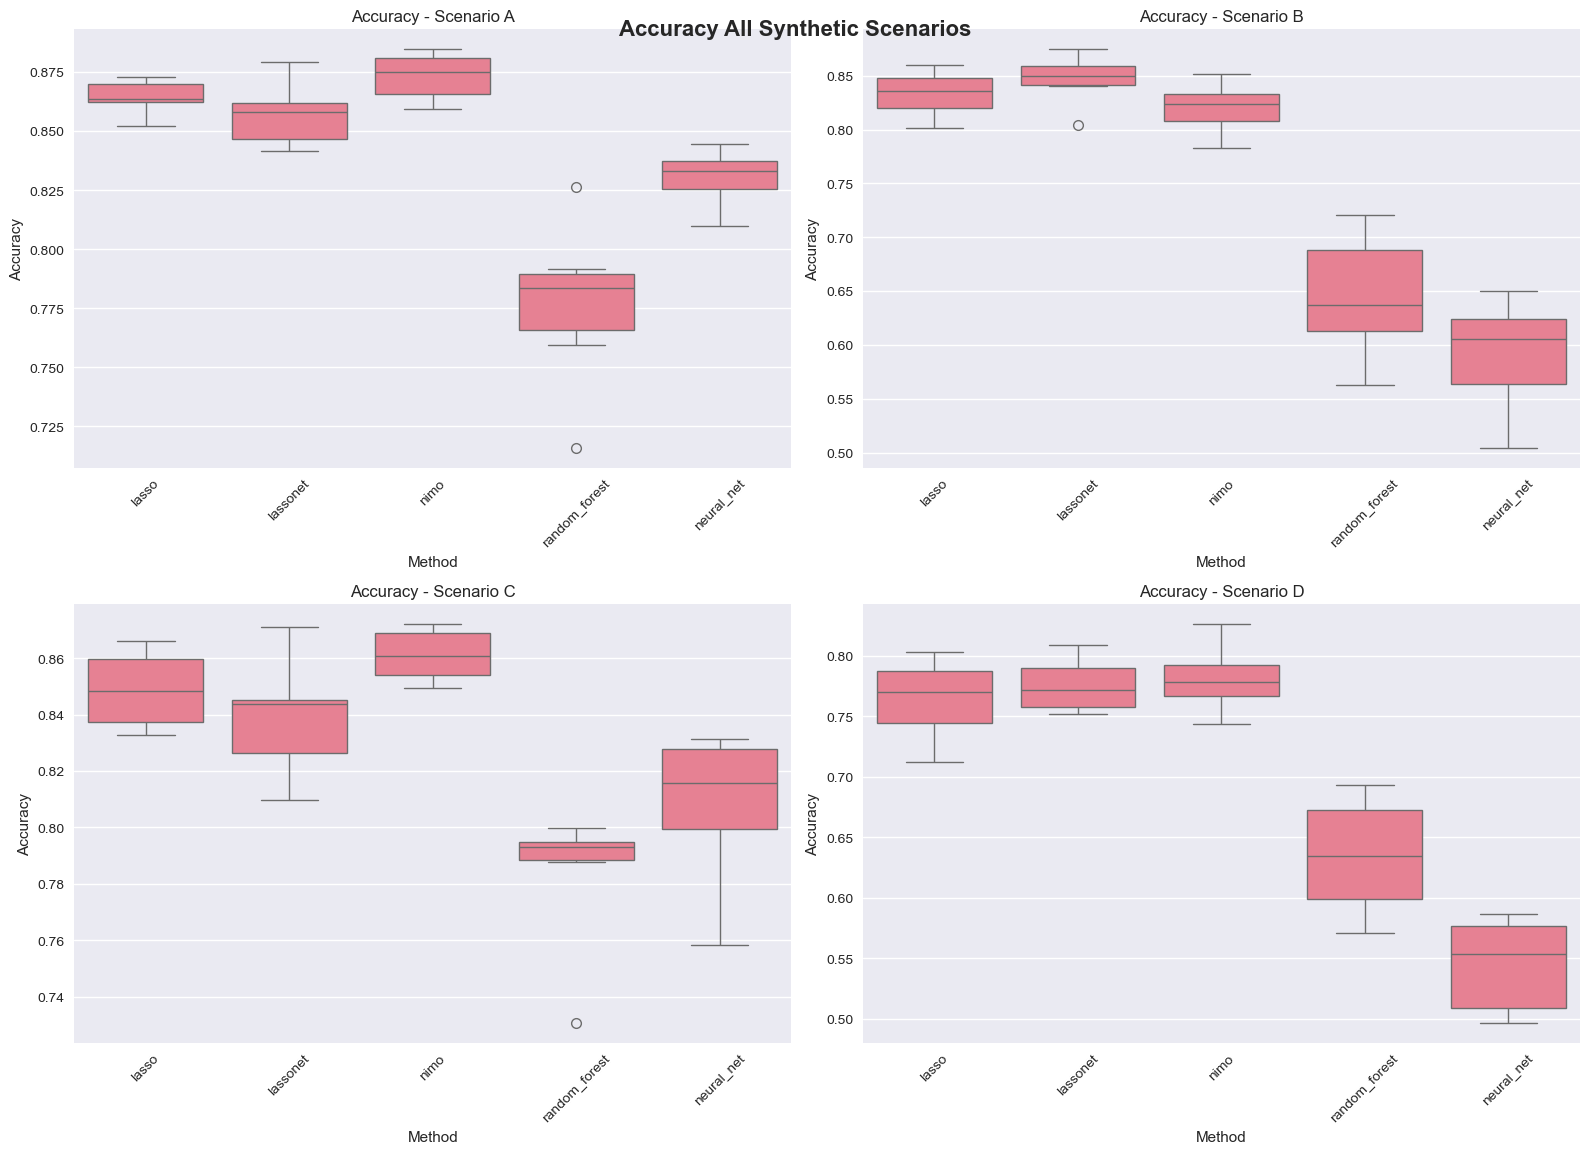

In [22]:
# 5. Performance by Dataset - Accuracy
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Add main title
fig.suptitle('Accuracy All Synthetic Scenarios', fontsize=16, fontweight='bold', y=0.95)

for i, dataset in enumerate(synthetic_datasets):
    dataset_data = df_synthetic[df_synthetic['dataset_id'] == dataset]
    
    # Accuracy by method for this dataset
    sns.boxplot(data=dataset_data, x='model_name', y='accuracy', ax=axes[i])
    axes[i].set_title(f'Accuracy - Scenario {dataset}')
    axes[i].set_xlabel('Method')
    axes[i].set_ylabel('Accuracy')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# 6. Summary Statistics Table
print("\n=== PERFORMANCE SUMMARY - SYNTHETIC DATASETS ===")
print("\nF1 Score:")
f1_summary = df_synthetic.groupby('model_name')['f1'].agg(['mean', 'std', 'min', 'max']).round(4)
print(f1_summary)

print("\nAccuracy:")
acc_summary = df_synthetic.groupby('model_name')['accuracy'].agg(['mean', 'std', 'min', 'max']).round(4)
print(acc_summary)

print("\nTraining Time (seconds):")
time_summary = df_synthetic.groupby('model_name')['training_time'].agg(['mean', 'std', 'min', 'max']).round(4)
print(time_summary)



=== PERFORMANCE SUMMARY - SYNTHETIC DATASETS ===

F1 Score:
                 mean     std     min     max
model_name                                   
lasso          0.8337  0.0349  0.7610  0.8775
lassonet       0.8309  0.0373  0.7240  0.8853
neural_net     0.7420  0.0851  0.5974  0.8426
nimo           0.8365  0.0456  0.7248  0.8872
random_forest  0.7503  0.0469  0.6832  0.8349

Accuracy:
                 mean     std     min     max
model_name                                   
lasso          0.8277  0.0439  0.7126  0.8728
lassonet       0.8295  0.0379  0.7516  0.8794
neural_net     0.6935  0.1341  0.4968  0.8444
nimo           0.8339  0.0414  0.7436  0.8846
random_forest  0.7097  0.0830  0.5624  0.8262

Training Time (seconds):
                  mean      std      min      max
model_name                                       
lasso           0.1289   0.0443   0.0813   0.2411
lassonet       56.0176  27.2781  27.7266  88.0348
neural_net      1.0268   0.1292   0.9138   1.4952
nimo    